In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (150, 5)
plt.rcParams['font.family'] = 'sans-serif'
# Increase pandas width
pd.set_option('display.width', 190)
# Inline plots yay
%matplotlib inline

In [8]:
users_file = 'users.csv'
raw_data = pd.read_csv(users_file, index_col='RESPID')

In [9]:
raw_data.head()

,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
RESPID,,,,,,,,,,,,,,,,,,,,,
36927,Female,60,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49,50,49,...,50,50,71,52,71,9,7,72,49,26
3566,Female,36,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55,55,62,...,12,65,65,80,79,51,31,68,54,33
20054,Female,52,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11,50,9,...,50,94,51,74,66,27,46,73,8,31
41749,Female,40,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81,80,88,...,76,74,64,73,85,61,77,76,78,88
23108,Female,16,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76,79,78,...,56,13,82,79,68,71,NaN,86,80,32


# Employment status plots

## By age

In [10]:
data = raw_data.copy()[ ['GENDER', 'AGE', 'WORKING'] ]
data = data.dropna()
data.head()

,GENDER,AGE,WORKING
RESPID,,,
36927,Female,60,Other
3566,Female,36,Full-time housewife / househusband
20054,Female,52,Employed 30+ hours a week
41749,Female,40,Employed 8-29 hours per week
23108,Female,16,Full-time student


In [11]:
# Calculate average age for working status for gender male
working_status_by_age_male = data[data['GENDER'] == 'Male'].groupby('WORKING').mean()
working_status_by_age_male.columns = ['AGE_MALE']

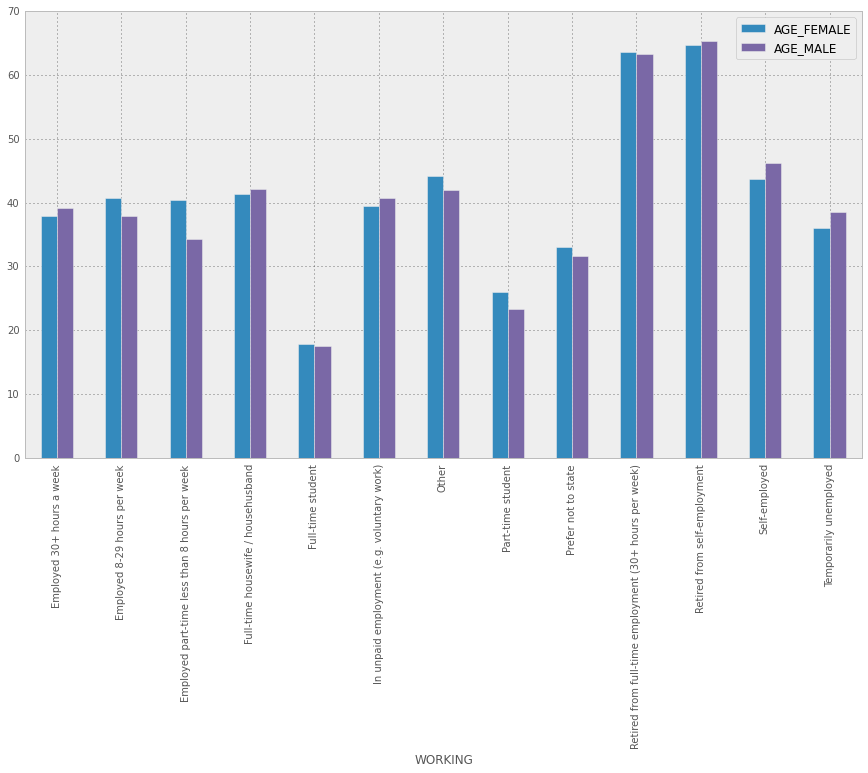

In [12]:
# Calculate for female and concat the male average
working_status_by_age_and_gender = data[data['GENDER'] == 'Female'].groupby('WORKING').mean()
working_status_by_age_and_gender.columns = ['AGE_FEMALE']
working_status_by_age_and_gender['AGE_MALE'] = working_status_by_age_male
working_status_by_age_and_gender.plot(kind='bar', figsize=(15,8))

## Unemployment by region
__Note__ that apparently WORKING values for Region 'Centre' are completely missing (all NaN)

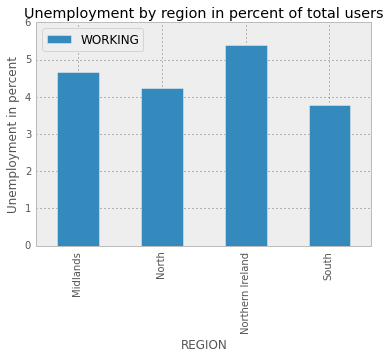

In [13]:
data = raw_data.copy()[['REGION', 'WORKING']]
# North Ireland is the same as Northern Ireland
data.loc[data['REGION'] == 'North Ireland' , 'REGION'] = 'Northern Ireland'

# Sum up the total amount of people by region
total_users_by_region = data['REGION'].value_counts()

# Group by region and divide by total number of users from that region to get the unemployment rate
grouped_by_region = data[data['WORKING'] == 'Temporarily unemployed'].groupby('REGION').count()
p = grouped_by_region.apply(lambda x: x * 100 / total_users_by_region[x.index] ).plot(kind='bar')

p.set_title("Unemployment by region in percent of total users")
p.set_ylabel("Unemployment in percent")

# Average rating by employment status

                                                  WORKING  Rating
0                                                   Other       6
1                                                   Other       9
2                      Full-time housewife / househusband      71
3                      Full-time housewife / househusband      44
4                      Full-time housewife / househusband      16
5                      Full-time housewife / househusband      41
6                               Employed 30+ hours a week      13
7                               Employed 30+ hours a week      46
8                               Employed 30+ hours a week      33
9                               Employed 30+ hours a week      48
10                              Employed 30+ hours a week      50
11                              Employed 30+ hours a week      71
12                           Employed 8-29 hours per week      33
13                           Employed 8-29 hours per week      90
14        

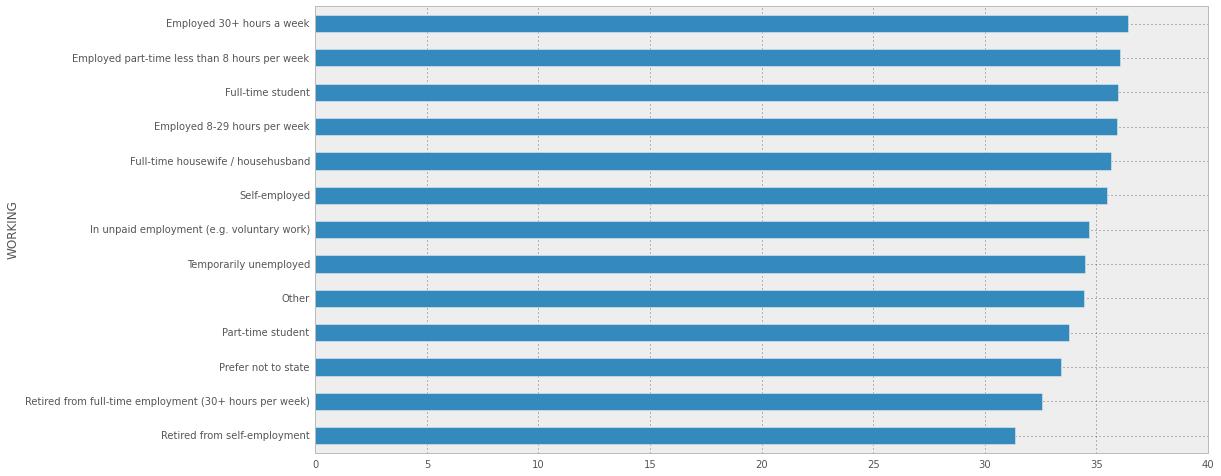

In [14]:
data = pd.read_csv('users.csv')[ ['RESPID', 'WORKING']]
#data = raw_data.copy()[['WORKING']]
rating_data = pd.read_csv('train.csv')[ ['User', 'Rating'] ]

data = data.merge(rating_data, left_on="RESPID", right_on='User')
data = data.drop( ['RESPID', 'User'], axis=1)
print(data)

avg_rating_by_working = data.groupby('WORKING').mean()
avg_rating_by_working.sort(columns='Rating', inplace=True)
avg_rating_by_working.plot(kind='barh', legend=False, figsize=(16,8))

In [15]:
# The visualization on the official site had a different result, so test the calculation with an example
a = data[data.WORKING == 'Full-time housewife / househusband']['Rating'].sum()
b = data[data.WORKING == 'Full-time housewife / househusband']['Rating'].count()
float(a) / b

35.63239124143918

# Average rating by age

        AGE  Rating
0        60       6
1        60       9
2        36      71
3        36      44
4        36      16
5        36      41
6        52      13
7        52      46
8        52      33
9        52      48
10       52      50
11       52      71
12       40      33
13       40      90
14       40      52
15       40      53
16       40      52
17       16      10
18       16      46
19       16      72
20       16      93
21       16      47
22       16      97
23       16      72
24       20      92
25       20      51
26       20      54
27       20      74
28       58      46
29       58      28
...     ...     ...
176803   43      14
176804   43      35
176805   46      30
176806   46      10
176807   46      48
176808   46       8
176809   46      28
176810   46      30
176811   46      17
176812   24      37
176813   24      12
176814   24      28
176815   24      14
176816   48      29
176817   48      29
176818   48      48
176819   60       4
176820   60      22


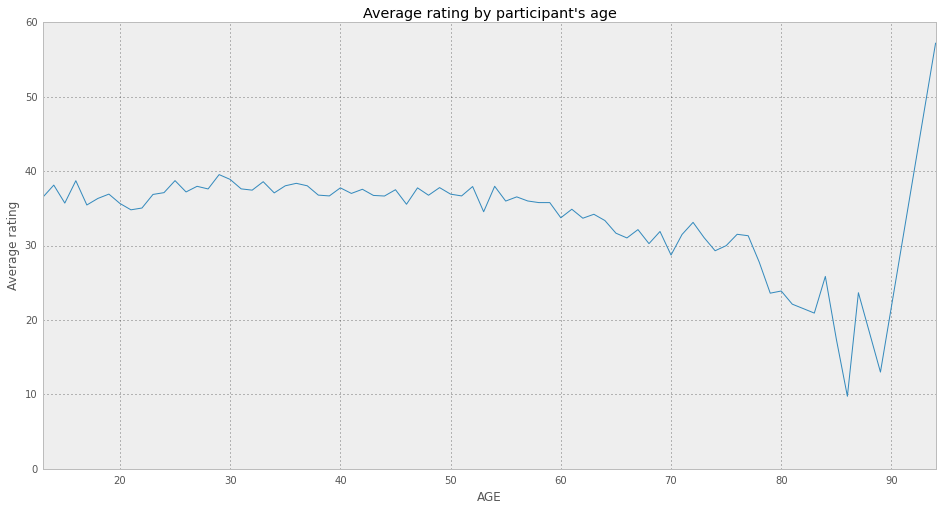

In [28]:
data = pd.read_csv('users.csv')[ ['RESPID', 'AGE']]
#data = raw_data.copy()[['WORKING']]
rating_data = pd.read_csv('train.csv')[ ['User', 'Rating'] ]

data = data.merge(rating_data, left_on="RESPID", right_on='User')
data = data.drop( ['RESPID', 'User'], axis=1)
print(data)

avg_rating_by_age = data.groupby('AGE').mean()
avg_rating_by_age.sort(inplace=True)
p = avg_rating_by_age.plot(legend=False, figsize=(16,8))
p.set_ylabel("Average rating")
p.set_title("Average rating by participant's age")

# Music interest by age 

In [16]:
# Transform the music interest into a usable value
def music_interest_transform(answer):
    return {
        'Music means a lot to me and is a passion of mine' : 1,
        'Music is important to me but not necessarily more important than other hobbies or interests' : 0.75,
        'Music is important to me but not necessarily more important': 0.75,
        'I like music but it does not feature heavily in my life': 0.5,
        'Music is no longer as important as it used to be to me': 0.25,
        'Music has no particular interest for me': 0
    }.get(answer, np.nan)

data = raw_data[ ['AGE', 'REGION', 'MUSIC'] ]
data.loc[:, 'MUSIC'] = data['MUSIC'].apply(music_interest_transform)

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


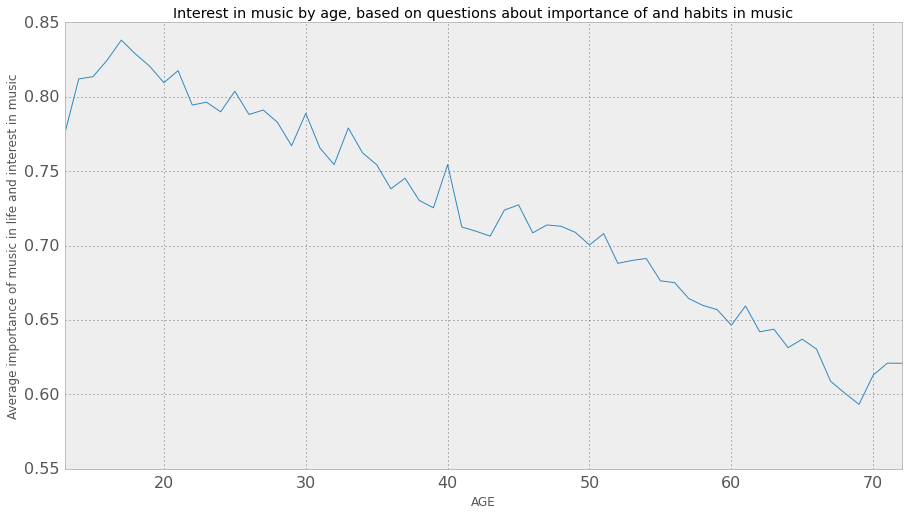

In [17]:
# Create a filter that will remove groups with less than 100 users
ages_with_enough_users = data['AGE'].value_counts() > 100
# Plot by age
group_by_age = data[['AGE', 'MUSIC']].dropna().groupby('AGE').mean()
p = group_by_age[ages_with_enough_users].plot(figsize=(15,8), fontsize=16, title="Interest in music by age, based on questions about importance of and habits in music", legend=False)
p.set_ylabel("Average importance of music in life and interest in music")

#Average rating by music interest

        MUSIC  Rating
0        0.75       6
1        0.75       9
2        0.75      71
3        0.75      44
4        0.75      16
5        0.75      41
6        0.50      13
7        0.50      46
8        0.50      33
9        0.50      48
10       0.50      50
11       0.50      71
12       1.00      33
13       1.00      90
14       1.00      52
15       1.00      53
16       1.00      52
17       1.00      10
18       1.00      46
19       1.00      72
20       1.00      93
21       1.00      47
22       1.00      97
23       1.00      72
24       1.00      92
25       1.00      51
26       1.00      54
27       1.00      74
28       0.50      46
29       0.50      28
...       ...     ...
176803   0.75      14
176804   0.75      35
176805   0.75      30
176806   0.75      10
176807   0.75      48
176808   0.75       8
176809   0.75      28
176810   0.75      30
176811   0.75      17
176812   0.50      37
176813   0.50      12
176814   0.50      28
176815   0.50      14
176816   0

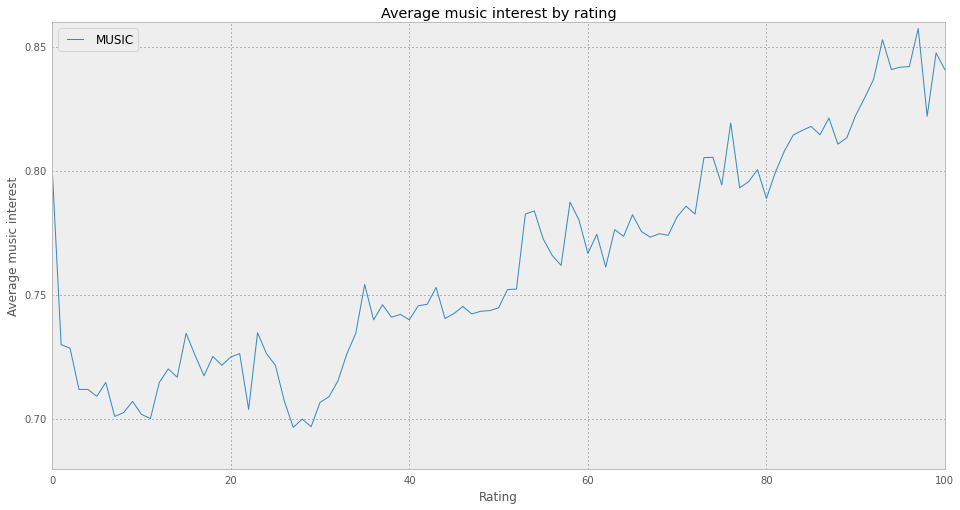

In [43]:
user_data = pd.read_csv('users.csv')[ ['RESPID', 'MUSIC']]
#data = raw_data.copy()[['WORKING']]
rating_data = pd.read_csv('train.csv')[ ['User', 'Rating'] ]

user_data = user_data.merge(rating_data, left_on="RESPID", right_on='User')
user_data = user_data.drop( ['RESPID', 'User'], axis=1)

user_data.loc[:, 'MUSIC'] = user_data['MUSIC'].apply(music_interest_transform)
print(user_data)
p = user_data.groupby('Rating').mean().plot(figsize=(16,8))
p.set_ylabel("Average music interest")
p.set_title("Average music interest by rating")

# Music interest by region

        AGE    REGION  MUSIC
RESPID                      
36927    60     South   0.75
3566     36     South   0.75
20054    52  Midlands   0.50
41749    40     South   1.00
23108    16     North   1.00
42754    20  Midlands   1.00
4596     58     North   0.50
40555    50  Midlands   0.75
8673     45    Centre   0.50
5195     41     South   0.75
33301    21     South   0.75
30264    56     North   0.50
18020    57     North   0.00
24241    31     North   0.75
41557    20     North   1.00
2314     32  Midlands   0.75
20646   NaN  Midlands   1.00
672      35     North   0.75
23151    65  Midlands   0.75
47285    43    Centre   0.50
1596     41     North   0.75
3975     41     North   0.50
27163    45  Midlands   0.75
33041    28       NaN   0.75
13487    34  Midlands   0.25
14286    46     South   0.75
11495    52     North   0.75
14632    49     North   0.50
24444    23     North   1.00
40602   NaN  Midlands   0.50
...     ...       ...    ...
20378    36  Midlands   1.00
14475    55  M

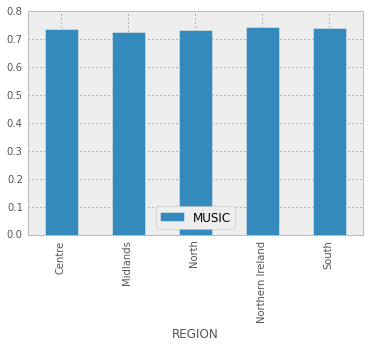

In [19]:
# Plot by region
data.loc[data['REGION'] == 'North Ireland' , 'REGION'] = 'Northern Ireland'
x = data[data['REGION'] == 'Centre']
print(data)
group_by_region = data[['REGION', 'MUSIC']].dropna().groupby('REGION').mean()
group_by_region.plot(kind='bar')

### Questions Q1-Q19
<table>
    <tr>
        <th>Q</th>
        <th>Full question</th>
    <tr>
        <td>Q1</td>
        <td>I enjoy actively searching for and discovering music that I have never heard before</td> 
    </tr>
    <tr>
        <td>Q2</td>
        <td>I find it easy to find new music</td> 
    </tr>
    <tr>
        <td>Q3</td>
        <td>I am constantly interested in and looking for more music</td> 
    </tr>
    <tr>
        <td>Q4</td>
        <td>I would like to buy new music but I don’t know what to buy</td> 
    </tr>
    <tr>
        <td>Q5</td>
        <td>I used to know where to find music</td> 
    </tr>
    <tr>
        <td>Q6</td>
        <td>I am not willing to pay for music</td> 
    </tr>
    <tr>
        <td>Q7</td>
        <td>I enjoy music primarily from going out to dance</td> 
    </tr>
    <tr>
        <td>Q8</td>
        <td>Music for me is all about nightlife and going out</td> 
    </tr>
    <tr>
        <td>Q9</td>
        <td>I am out of touch with new music</td> 
    </tr>
    <tr>
        <td>Q10</td>
        <td>My music collection is a source of pride</td> 
    </tr>
    <tr>
        <td>Q11</td>
        <td>Pop music is fun</td> 
    </tr>
    <tr>
        <td>Q12</td>
        <td>Pop music helps me to escape</td> 
    </tr>
    <tr>
        <td>Q13</td>
        <td>I want a multi media experience at my fingertips wherever I go</td> 
    </tr>
    <tr>
        <td>Q14</td>
        <td>I love technology</td> 
    </tr>
    <tr>
        <td>Q15</td>
        <td>People often ask my advice on music - what to listen to</td> 
    </tr>
    <tr>
        <td>Q16</td>
        <td>I would be willing to pay for the opportunity to buy new music pre-release</td> 
    </tr>
    <tr>
        <td>Q17</td>
        <td>I find seeing a new artist / band on TV a useful way of discovering new music</td> 
    </tr>
    <tr>
        <td>Q18</td>
        <td>I like to be at the cutting edge of new music</td> 
    </tr>
    <tr>
        <td>Q19</td>
        <td>I like to know about music before other people </td> 
    </tr>
</table>

## Willingness to pay for music in relation to importance of music in life

Questions that show the willingness to pay for music are Q4, ~Q6, Q16

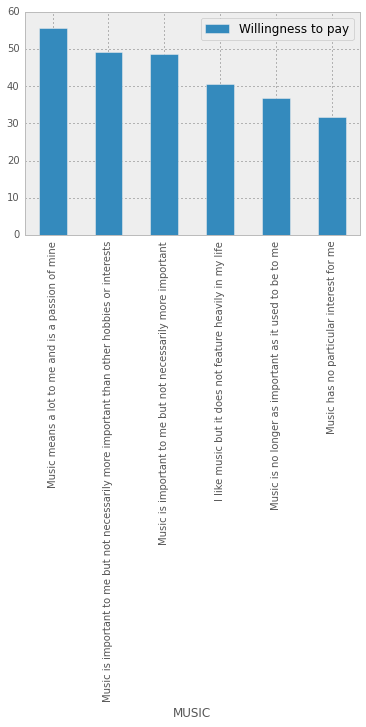

In [13]:
data = raw_data.copy()[['MUSIC', 'Q6', 'Q16']]

# Negate the value of Question 6 as it shows how NOT willing people are to pay for music
data['Q6'] = data['Q6'].apply(lambda x: 100 - x)
# Fill missing values in all question columns with their mean values
#data['Q4'].fillna(data['Q4'].mean(), inplace=True)
data['Q6'].fillna(data['Q6'].mean(), inplace=True)
data['Q16'].fillna(data['Q16'].mean(), inplace=True)

data['Willingness to pay'] = (data['Q6'] + data['Q16']) / 2.0
willingness_to_pay_by_music_interest = data[['MUSIC', 'Willingness to pay']].groupby('MUSIC').mean()
willingness_to_pay_by_music_interest.sort(columns='Willingness to pay', ascending=False).plot(kind='bar')